In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer #una función más avanzada que vectorizar así nomás
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("data.csv")
df.head

<bound method NDFrame.head of        crop  moisture  temp  pump
0    cotton       638    16     1
1    cotton       522    18     1
2    cotton       741    22     1
3    cotton       798    32     1
4    cotton       690    28     1
..      ...       ...   ...   ...
195  cotton       941    13     1
196  cotton       902    45     1
197  cotton       894    42     1
198  cotton      1022    45     1
199  cotton       979    10     1

[200 rows x 4 columns]>

In [13]:
X = df[['moisture', 'temp']]
y = df['pump']

In [14]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Clasificadores
clasificadores = {
    'Naive Bayes Multinomial': MultinomialNB(),
    'Árbol Aleatorio': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC()
}

In [23]:
# Entrenamiento y evaluación clasificadores
results = {}
for name, clf in clasificadores.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

In [24]:
# Ver los resultados de exactitud
print("Comparación de Exactitud:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.2f}")

Comparación de Exactitud:
Naive Bayes Multinomial: 0.90
Árbol Aleatorio: 1.00
SVM: 0.95


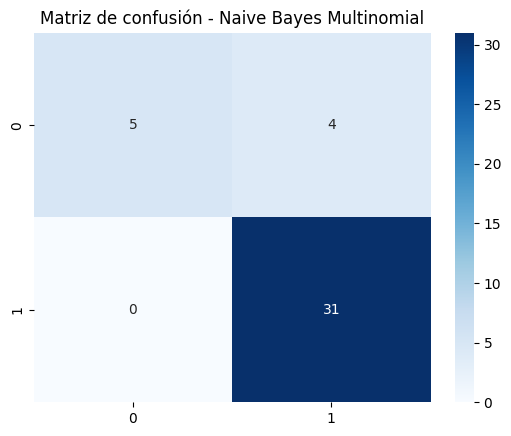

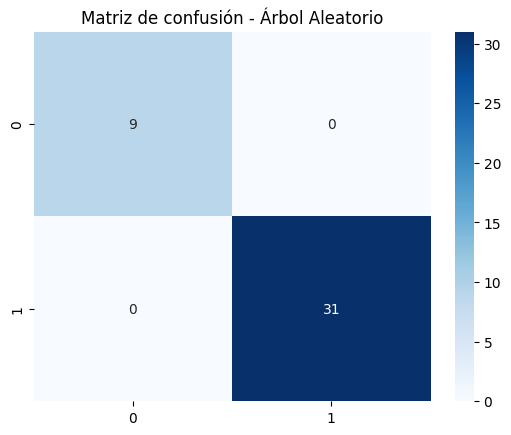

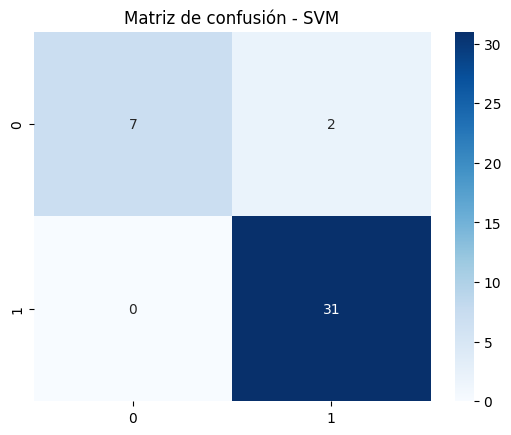

In [25]:
##Matrices de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

clasificadores = {
    'Naive Bayes Multinomial': MultinomialNB(),
    'Árbol Aleatorio': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC()
}

for name, clf in clasificadores.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de confusión - {name}')
    plt.show()

In [19]:
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        31

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

